# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Results - Observations:
    
    The Latitude vs. Temperature Plot,  visually validates that closer to Equator (0degree Lat) it gets warmer with most cities being within -25 to 25 degrees Latitude. Also they change depending on the time of the day.
    
    Also reflects no strong relationship between Lat and Humidity, though it appears to be more humid as you are in the S. Hemishpere (0 to 30/40 deg. Lat) 
    Latitude and Cloudiness reflect very little relationship, though interesting there appears to be standardization of results as we see many groupings 
    
    Latitude and wind reflect very little relationship, though it appears that more towards the S. Hempishphere its more windy based on the number of cities in this region relative to N.Hempisphere.
    
    

In [8]:
# Dependencies and Setup

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests 
import time 
import openweathermapy.core as owm
from datetime import datetime

# API key - note needed account to be created (free)
from api_keys import api_key

#note need to install citipy 
#pip install citipy

# Additional imports - city information (provided)
## Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Refer link below for details on using openweathermapy.core python utility
#https://github.com/crazycapivara/openweathermapy


# Output File (CSV)
#
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

current_time = datetime.now()
current_date = current_time.strftime('%m/%d/%Y')




## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#city_weather = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Refer usage example 
#settings = {"units": "metric", "lang": "DE"}
#>>> data = owm.get_current("Kassel,DE", **settings)
# settings containing APIKEY
#>>> settings = {"APPID": 1111111111, "units": "metric"}

# Refer link to formt and extract weather data 
# https://github.com/crazycapivara/openweathermapy

# example to select weather info from API 
# https://samples.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=b6907d289e10d714a6e88b30761fae22


# List to hold city weather information 

city_weather = []

x = 1
set = 1

settings = {'units':'imperial', 'appid':api_key}


for city in cities:
    
    try:
        data = owm.get_current(city, **settings)     
        
      

        city_weather.append({ 
        'City'       :  data['name'],
        'Cloudiness' : data['clouds']['all'],
        'Country'    : data['sys']['country'],
        'Date'       : data['dt'],
        'Humidity'   : data['main']['humidity'],
        'Lat'        : data['coord']['lat'],
        'Lng'        : data['coord']['lon'],
        'Max_Temp'   : data['main']['temp_max'],
        'Wind_Speed' : data['wind'] ['speed']
                        })
        print(f"Processing Record {x} of Set {set} |  {city}")
    
    except:
        print("Missing City....skipping")   
        x = 0
        set = set + 1

    x = x + 1
                                             
print(' Extraction Complelte')
                                             

Processing Record 1 of Set 1 |  bonavista
Processing Record 2 of Set 1 |  cuitlahuac
Processing Record 3 of Set 1 |  port keats
Processing Record 4 of Set 1 |  maniitsoq
Processing Record 5 of Set 1 |  tongliao
Processing Record 6 of Set 1 |  saldanha
Processing Record 7 of Set 1 |  hilo
Processing Record 8 of Set 1 |  avarua
Processing Record 9 of Set 1 |  vila franca do campo
Processing Record 10 of Set 1 |  okhotsk
Processing Record 11 of Set 1 |  gat
Processing Record 12 of Set 1 |  tasiilaq
Missing City....skipping
Processing Record 1 of Set 2 |  lavrentiya
Processing Record 2 of Set 2 |  victoria
Processing Record 3 of Set 2 |  vaini
Processing Record 4 of Set 2 |  rikitea
Processing Record 5 of Set 2 |  mehamn
Processing Record 6 of Set 2 |  ushuaia
Processing Record 7 of Set 2 |  kapaa
Processing Record 8 of Set 2 |  dikson
Processing Record 9 of Set 2 |  bredasdorp
Processing Record 10 of Set 2 |  baijiantan
Processing Record 11 of Set 2 |  lakatoro
Processing Record 12 of Set

Missing City....skipping
Processing Record 1 of Set 18 |  moron
Processing Record 2 of Set 18 |  iacu
Processing Record 3 of Set 18 |  la grande
Processing Record 4 of Set 18 |  constitucion
Processing Record 5 of Set 18 |  touros
Missing City....skipping
Processing Record 1 of Set 19 |  namatanai
Processing Record 2 of Set 19 |  green river
Processing Record 3 of Set 19 |  kuruman
Processing Record 4 of Set 19 |  soe
Processing Record 5 of Set 19 |  casablanca
Processing Record 6 of Set 19 |  turukhansk
Missing City....skipping
Processing Record 1 of Set 20 |  klaksvik
Processing Record 2 of Set 20 |  hualmay
Processing Record 3 of Set 20 |  pevek
Processing Record 4 of Set 20 |  northam
Processing Record 5 of Set 20 |  salalah
Processing Record 6 of Set 20 |  saint-philippe
Processing Record 7 of Set 20 |  atlantic beach
Processing Record 8 of Set 20 |  prata
Processing Record 9 of Set 20 |  san patricio
Processing Record 10 of Set 20 |  emilio carranza
Processing Record 11 of Set 20

Processing Record 19 of Set 29 |  merauke
Processing Record 20 of Set 29 |  apollonia
Processing Record 21 of Set 29 |  bud
Missing City....skipping
Processing Record 1 of Set 30 |  okuchi
Processing Record 2 of Set 30 |  turka
Processing Record 3 of Set 30 |  mercedes
Processing Record 4 of Set 30 |  pokhara
Processing Record 5 of Set 30 |  aginskoye
Processing Record 6 of Set 30 |  bull savanna
Processing Record 7 of Set 30 |  sterling
Processing Record 8 of Set 30 |  dori
Processing Record 9 of Set 30 |  shahr-e babak
Processing Record 10 of Set 30 |  saint anthony
Processing Record 11 of Set 30 |  adrar
Processing Record 12 of Set 30 |  chillicothe
Processing Record 13 of Set 30 |  byron bay
Processing Record 14 of Set 30 |  carinhanha
Processing Record 15 of Set 30 |  canals
Processing Record 16 of Set 30 |  vega de alatorre
Processing Record 17 of Set 30 |  vestmannaeyjar
Processing Record 18 of Set 30 |  gao
Processing Record 19 of Set 30 |  aykhal
Processing Record 20 of Set 30

Processing Record 4 of Set 47 |  oga
Processing Record 5 of Set 47 |  churachandpur
Processing Record 6 of Set 47 |  ereymentau
Processing Record 7 of Set 47 |  catia la mar
Processing Record 8 of Set 47 |  charters towers
Processing Record 9 of Set 47 |  ketchikan
Processing Record 10 of Set 47 |  nabire
Processing Record 11 of Set 47 |  mbini
Processing Record 12 of Set 47 |  grafenau
Missing City....skipping
Processing Record 1 of Set 48 |  albanel
 Extraction Complelte


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max_Temp      563
Wind_Speed    563
dtype: int64

In [12]:
city_weather_df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max_Temp', 'Wind_Speed'],
      dtype='object')

In [13]:
# Create a csv file with city weather 

city_weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

### Latitude vs. Temperature Plot

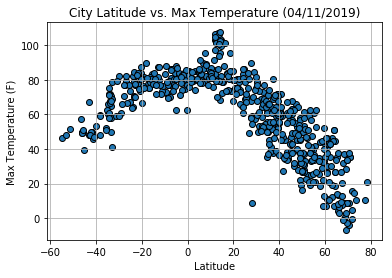

In [14]:

plt.scatter(city_weather_df.Lat,city_weather_df.Max_Temp,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.grid(True)
#plt.fig.canvas.draw_idle()
plt.savefig('output_data/lat_temp_plot.png')
plt.show()

### Latitude vs. Humidity Plot

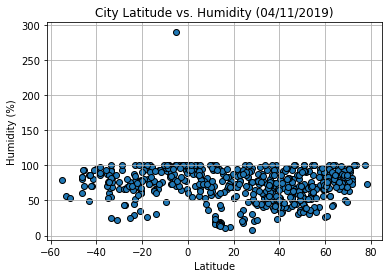

In [15]:

plt.scatter(city_weather_df.Lat,city_weather_df.Humidity,marker='o', edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid()
plt.savefig('output_data/Humidity_plot.png')
plt.show()

### Latitude vs. Cloudiness

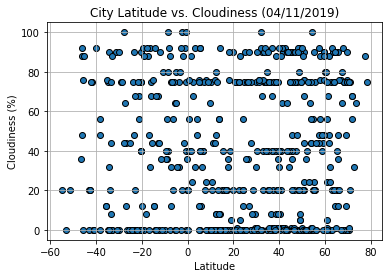

In [16]:
plt.scatter(city_weather_df.Lat,city_weather_df.Cloudiness,marker='o', edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid()
plt.savefig('output_data/Cloudiness_plot.png')
plt.show()


### Latitude vs. Wind Speed

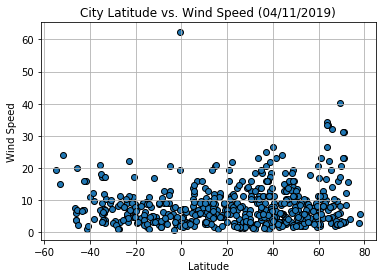

In [17]:

plt.scatter(city_weather_df.Lat,city_weather_df.Wind_Speed,marker='o', edgecolors='black')

#plt.scatter(City_Lat, City_Wind_Speed,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid()
plt.savefig('output_data/Wind_Speed_plot.png')
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot